In [1]:
import numpy as np
import csv
import os
import math
import random
import copy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
random.seed(42)
np.random.seed(42)

In [2]:
df=pd.read_csv('./Bike-Sharing-Dataset/day.csv', sep=',',header='infer')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Question 1

In [3]:
df_corr = df.corr(method='pearson')
df_corr

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


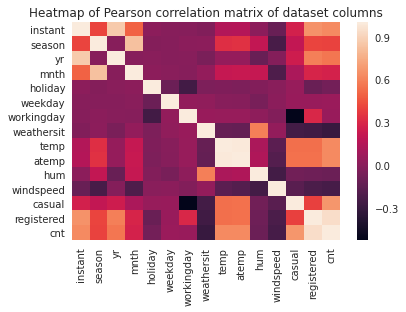

In [4]:
sns.set()
heatmap = sns.heatmap(df_corr)
plt.title('Heatmap of Pearson correlation matrix of dataset columns')
plt.show()

In [5]:
temp = copy.deepcopy(df_corr)
temp.drop(['instant','casual','registered','cnt'],axis=0,inplace=True) # Should not contain the three target variables nor instant
temp1 = temp[['casual']]
#temp1 = temp[['casual']]
li = np.asarray(temp1).T
li.shape = li.shape[1]
print(np.abs(li).max())
print(temp1._stat_axis.values.tolist()[np.argmax(li)])

0.5438636902622045
atemp


In [6]:
temp = copy.deepcopy(df_corr)
temp.drop(['instant','casual','registered','cnt'],axis=0,inplace=True)
temp1 = temp[['registered']]
#temp1 = temp[['casual']]
li = np.asarray(temp1).T
li.shape = li.shape[1]
print(np.abs(li).max())
print(temp1._stat_axis.values.tolist()[np.argmax(li)])

0.5942481679351337
yr


In [7]:
temp = copy.deepcopy(df_corr)
temp.drop(['instant','casual','registered','cnt'],axis=0,inplace=True)
temp1 = temp[['cnt']]
#temp1 = temp[['casual']]
li = np.asarray(temp1).T
li.shape = li.shape[1]
print(np.abs(li).max())
print(temp1._stat_axis.values.tolist()[np.argmax(li)])

0.6310656998491813
atemp


# Question 2

/home/dennis/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/dennis/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/dennis/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/dennis/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaba2a8940>,
      dtype=object)

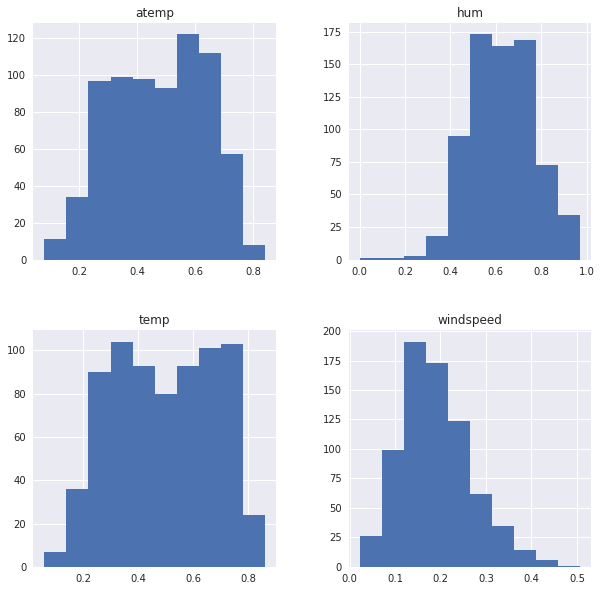

In [8]:
df.hist(column=['temp','atemp','hum','windspeed'],figsize=(10,10))

# Question 3

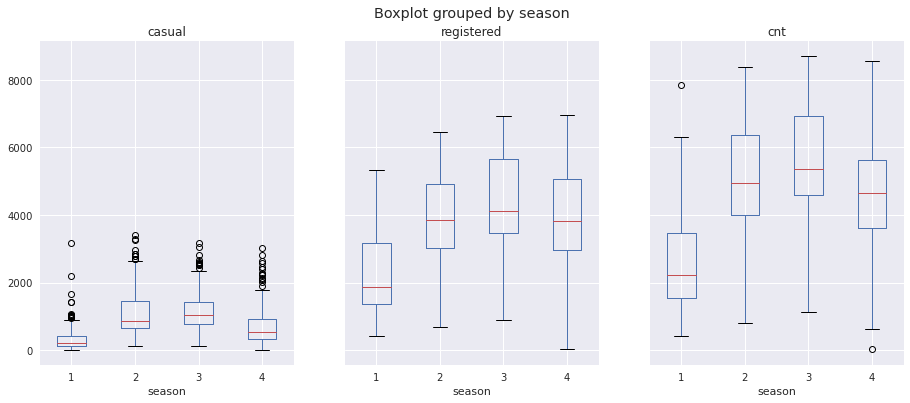

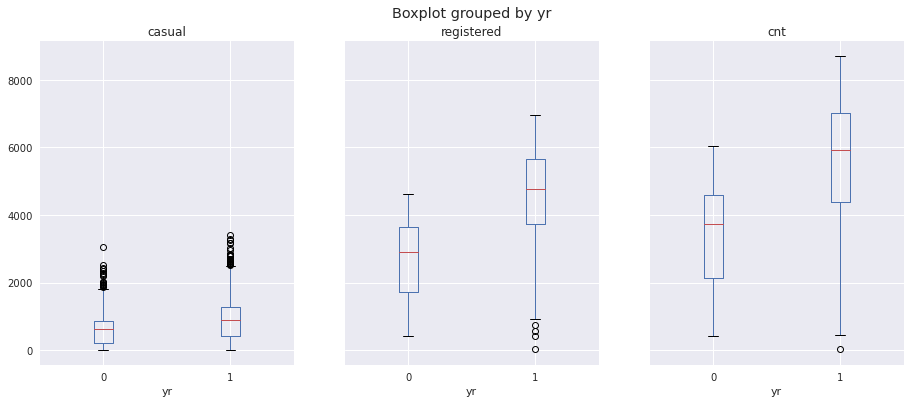

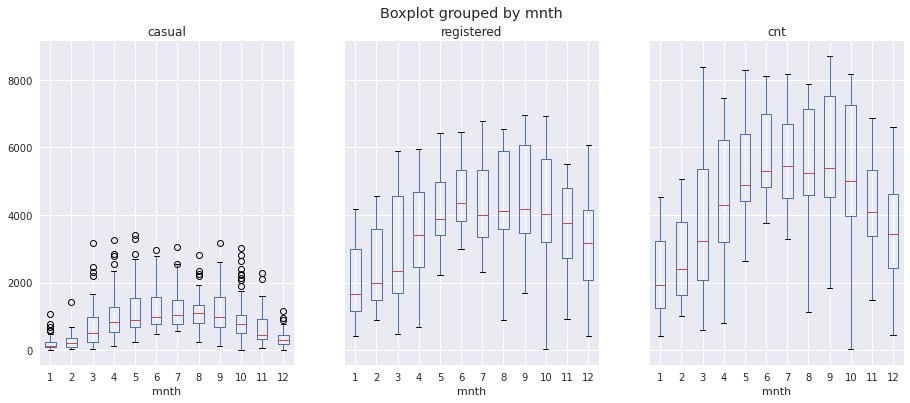

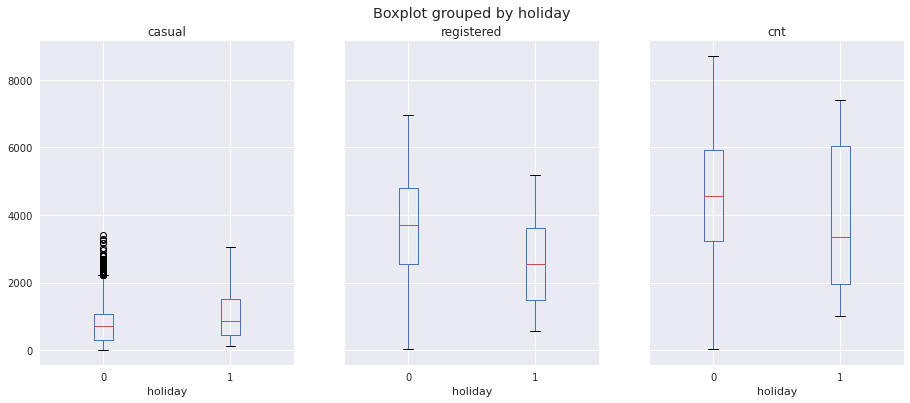

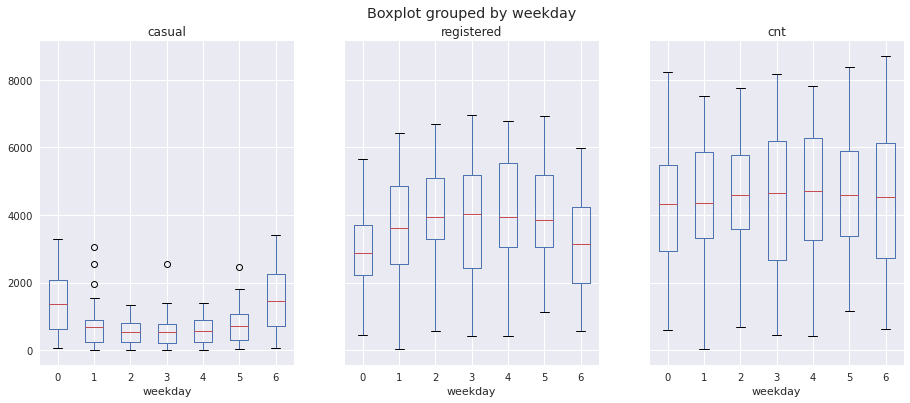

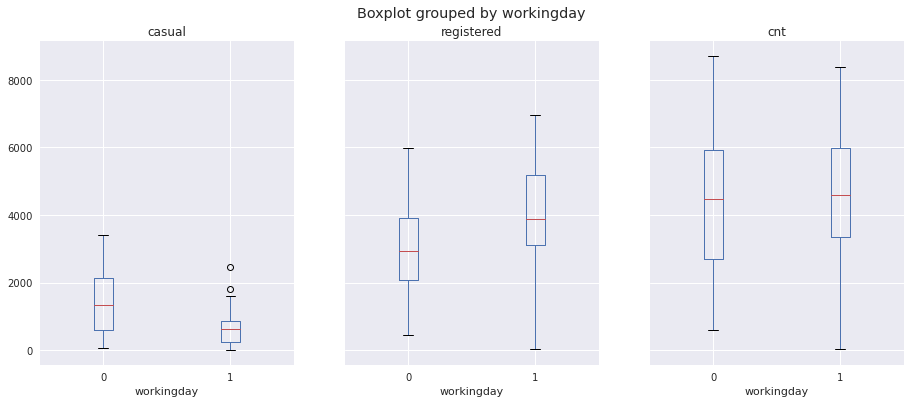

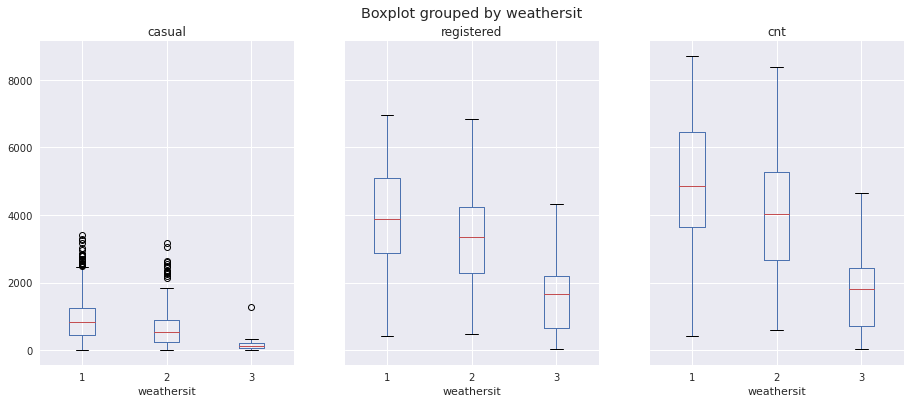

In [9]:
for col in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
    df.boxplot(by=col,column=['casual','registered','cnt'],figsize=(15,6),layout=(1,3))

# Question 4

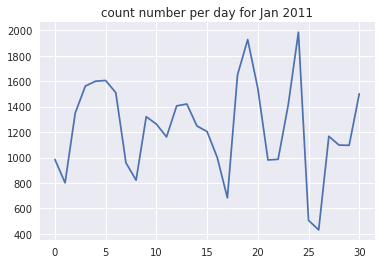

In [10]:
cnt1 = np.asarray(df['cnt'].head(31))
plt.title('count number per day for Jan 2011')
plt.plot(range(cnt1.shape[0]),cnt1)
#df.loc[31:58]

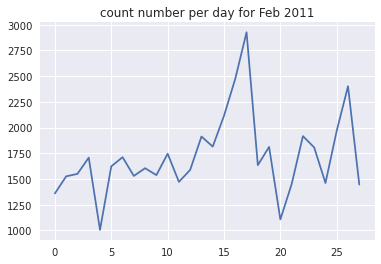

In [11]:
cnt2 = np.asarray(df['cnt'].loc[31:58])
plt.title('count number per day for Feb 2011')
plt.plot(range(cnt2.shape[0]),cnt2)

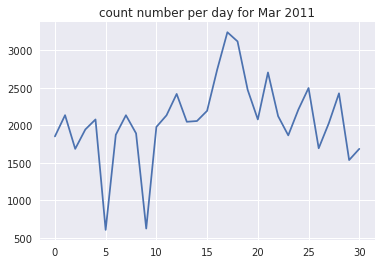

In [12]:
cnt3 = np.asarray(df['cnt'].loc[59:89])
plt.title('count number per day for Mar 2011')
plt.plot(range(cnt3.shape[0]),cnt3)

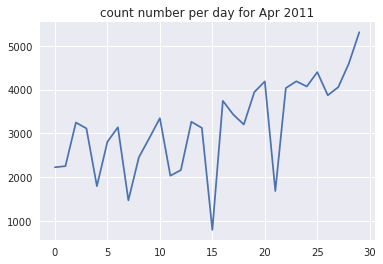

In [13]:
cnt4 = np.asarray(df['cnt'].loc[90:119])
plt.title('count number per day for Apr 2011')
plt.plot(range(cnt4.shape[0]),cnt4)

# Question 6

In [14]:
# We do scalar assignment for each feature.
# Since dteday is continuous from 2011-01-01 to 2012-12-31, we delete this column as instant has covered this information.
df_pre = copy.deepcopy(df)
del df_pre['dteday']

# Question 7

In [15]:
def stdit(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        STD = d.std()
        newDataFrame[c] = ((d - (MAX + MIN) / 2) / STD).tolist()
    return newDataFrame

In [16]:
del df_pre['casual']
del df_pre['registered']
del df_pre['cnt']
df_std = stdit(df_pre)
df_std

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,-1.728500,-1.350369,-0.999317,-1.59332,-2.99124,1.496418,-1.074729,0.000000,-0.634969,-0.591293,2.243804,-1.348183
1,-1.723764,-1.350369,-0.999317,-1.59332,-2.99124,-1.496418,-1.074729,0.000000,-0.529474,-0.651958,1.473273,-0.211468
2,-1.719028,-1.350369,-0.999317,-1.59332,-2.99124,-0.997612,1.074729,-1.835218,-1.442411,-1.660382,-0.343869,-0.214436
3,-1.714293,-1.350369,-0.999317,-1.59332,-2.99124,-0.498806,1.074729,-1.835218,-1.422547,-1.520981,0.731487,-1.350119
4,-1.709557,-1.350369,-0.999317,-1.59332,-2.99124,0.000000,1.074729,-1.835218,-1.275282,-1.415753,-0.346088,-1.006832
5,-1.704821,-1.350369,-0.999317,-1.59332,-2.99124,0.498806,1.074729,-1.835218,-1.398794,-1.391582,0.224750,-2.262800
6,-1.700086,-1.350369,-0.999317,-1.59332,-2.99124,0.997612,1.074729,0.000000,-1.441547,-1.541127,0.087384,-1.241342
7,-1.695350,-1.350369,-0.999317,-1.59332,-2.99124,1.496418,-1.074729,0.000000,-1.613751,-1.826992,0.348124,0.024216
8,-1.690615,-1.350369,-0.999317,-1.59332,-2.99124,-1.496418,-1.074729,-1.835218,-1.759432,-2.109753,-0.365677,1.251940
9,-1.685879,-1.350369,-0.999317,-1.59332,-2.99124,-0.997612,1.074729,-1.835218,-1.691145,-1.896739,-0.023401,-0.537568


In [17]:
df_pre

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
5,6,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565
6,7,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726
7,8,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804
8,9,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950
9,10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267


# Question 8

In [18]:
from sklearn.feature_selection import mutual_info_regression,f_regression
mat = np.asarray(df_std)
cnt = np.asarray(df['cnt'])
print('Mutual information (MI) of each feature:',mutual_info_regression(mat,cnt))

Mutual information (MI) of each feature: [0.90494168 0.21450326 0.27910152 0.37956772 0.01105096 0.04433741
 0.02698772 0.06473073 0.38937705 0.46445913 0.04549788 0.05546288]


In [19]:
print('F score of each feature:',f_regression(mat,cnt)[0])

F score of each feature: [476.81073992 143.96765259 344.89058554  62.00462455   3.42144104
   3.33109137   2.73674228  70.72929783 473.47171053 482.45431053
   7.46194     42.43784159]


# Question 10

In [20]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df_no_std = df_pre
mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=42)
mat_no_std_tr,mat_no_std_val,cnt_no_std_tr,cnt_no_std_val = train_test_split(np.asarray(df_no_std),cnt,test_size=0.2,random_state=42)

In [21]:
RMSE_lr_train = []
RMSE_lr_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    lr = LinearRegression().fit(mat_std_tr,cnt_std_tr)
    pred_train = lr.predict(mat_std_tr)
    pred_val = lr.predict(mat_std_val)
    RMSE_lr_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_lr_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Linear Regression for train data=',np.mean(RMSE_lr_train))
print('RMSE of Linear Regression for validation data=',np.mean(RMSE_lr_val))

RMSE of Linear Regression for train data= 857.4141611925413
RMSE of Linear Regression for validation data= 892.2260488561709


In [22]:
RMSE_r_train = []
RMSE_r_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    r = Ridge().fit(mat_std_tr,cnt_std_tr)
    pred_train = r.predict(mat_std_tr)
    pred_val = r.predict(mat_std_val)
    RMSE_r_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_r_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Ridge Regression for train data=',np.mean(RMSE_r_train))
print('RMSE of Ridge Regression for validation data=',np.mean(RMSE_r_val))

RMSE of Ridge Regression for train data= 859.8053931082768
RMSE of Ridge Regression for validation data= 888.6462039343298


In [23]:
RMSE_l_train = []
RMSE_l_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    l = Lasso().fit(mat_std_tr,cnt_std_tr)
    pred_train = l.predict(mat_std_tr)
    pred_val = l.predict(mat_std_val)
    RMSE_l_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_l_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Lasso Regression for train data=',np.mean(RMSE_l_train))
print('RMSE of Lasso Regression for validation data=',np.mean(RMSE_l_val))

RMSE of Lasso Regression for train data= 859.5323596000928
RMSE of Lasso Regression for validation data= 889.0131348207345


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2419752.1439956427, tolerance: 211408.4955671233
  positive)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14463505.696088433, tolerance: 217225.80296558223
  positive)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7458368.382514119, tolerance: 216255.4801006849
  positive)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase 

# Question 11

In [24]:
RMSE_lr_train_no_std = []
RMSE_lr_val_no_std = []
for fold in range(10):
    mat_no_std_tr,mat_no_std_val,cnt_no_std_tr,cnt_no_std_val = train_test_split(np.asarray(df_no_std),cnt,test_size=0.2,random_state=fold)
    lr = LinearRegression().fit(mat_no_std_tr,cnt_no_std_tr)
    pred_train = lr.predict(mat_no_std_tr)
    pred_val = lr.predict(mat_no_std_val)
    RMSE_lr_train_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_tr,pred_train)))
    RMSE_lr_val_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_val,pred_val)))
print('RMSE of Linear Regression without feature scaling for train data=',np.mean(RMSE_lr_train_no_std))
print('RMSE of Linear Regression without feature scaling for validation data=',np.mean(RMSE_lr_val_no_std))

RMSE of Linear Regression without feature scaling for train data= 857.4141611925413
RMSE of Linear Regression without feature scaling for validation data= 892.2260488561715


In [25]:
RMSE_r_train_no_std = []
RMSE_r_val_no_std = []
for fold in range(10):
    mat_no_std_tr,mat_no_std_val,cnt_no_std_tr,cnt_no_std_val = train_test_split(np.asarray(df_no_std),cnt,test_size=0.2,random_state=fold)
    r = Ridge().fit(mat_no_std_tr,cnt_no_std_tr)
    pred_train = r.predict(mat_no_std_tr)
    pred_val = r.predict(mat_no_std_val)
    RMSE_r_train_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_tr,pred_train)))
    RMSE_r_val_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_val,pred_val)))
print('RMSE of Ridge Regression without feature scaling for train data=',np.mean(RMSE_r_train_no_std))
print('RMSE of Ridge Regression without feature scaling for validation data=',np.mean(RMSE_r_val_no_std))

RMSE of Ridge Regression without feature scaling for train data= 865.0786146121791
RMSE of Ridge Regression without feature scaling for validation data= 886.4463813396521


In [26]:
RMSE_l_train_no_std = []
RMSE_l_val_no_std = []
for fold in range(10):
    mat_no_std_tr,mat_no_std_val,cnt_no_std_tr,cnt_no_std_val = train_test_split(np.asarray(df_no_std),cnt,test_size=0.2,random_state=fold)
    l = Lasso().fit(mat_no_std_tr,cnt_no_std_tr)
    pred_train = l.predict(mat_no_std_tr)
    pred_val = l.predict(mat_no_std_val)
    RMSE_l_train_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_tr,pred_train)))
    RMSE_l_val_no_std.append(np.sqrt(mean_squared_error(cnt_no_std_val,pred_val)))
print('RMSE of Lasso Regression for train data=',np.mean(RMSE_l_train_no_std))
print('RMSE of Lasso Regression for validation data=',np.mean(RMSE_l_val_no_std))

RMSE of Lasso Regression for train data= 859.5562587637785
RMSE of Lasso Regression for validation data= 887.0165204626616


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217264778.9476306, tolerance: 211408.4955671233
  positive)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231414779.82577667, tolerance: 217225.80296558223
  positive)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215182157.64781055, tolerance: 216255.4801006849
  positive)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase 

# Question 12

In [27]:
for i in range(len(f_regression(mat,cnt)[0])):
    print('F score for',df_std.columns.values.tolist()[i],'& p-value for it:',f_regression(mat,cnt)[0][i],' ',f_regression(mat,cnt)[1][i])

F score for instant & p-value for it: 476.8107399195832   1.0207631771174209e-81
F score for season & p-value for it: 143.96765259091728   2.1339966843421292e-30
F score for yr & p-value for it: 344.8905855356793   2.4835399044546224e-63
F score for mnth & p-value for it: 62.004624548332195   1.24311177786548e-14
F score for holiday & p-value for it: 3.4214410399719473   0.0647593579261283
F score for weekday & p-value for it: 3.3310913651745624   0.06839080695470057
F score for workingday & p-value for it: 2.7367422831914108   0.09849496160025555
F score for weathersit & p-value for it: 70.72929782920811   2.1509758214249938e-16
F score for temp & p-value for it: 473.4717105349773   2.8106223975901415e-81
F score for atemp & p-value for it: 482.4543105289897   1.854504125284329e-82
F score for hum & p-value for it: 7.46193999634535   0.006454143325437774
F score for windspeed & p-value for it: 42.43784159346339   1.3599586778866672e-10


# Question 13

In [28]:
f_score = copy.deepcopy(f_regression(mat,cnt)[0]).tolist()
f_score.sort(reverse=True)
ratio = 0.95
total = sum(f_score)
for i in range(len(f_score)):
    if sum(f_score[:i]) / total > ratio:
        break
print(i)

7


In [29]:
temp = f_regression(mat,cnt)[0]
for ii in range(i):
    print(df_std.columns.values.tolist()[int(np.where(temp==f_score[ii])[0])])

atemp
instant
temp
yr
season
weathersit
mnth


# Question 14

In [30]:
import time
from sklearn.preprocessing import PolynomialFeatures
time_start =time.time()
for degree in range(1,8):
    poly = PolynomialFeatures(degree).fit_transform(mat)
    RMSE_poly_tr = []
    RMSE_poly_val = []
    for fold in range(10):
        poly_tr,poly_val,poly_cnt_tr,poly_cnt_val = train_test_split(poly,cnt,test_size=0.2,random_state=fold)
        lr = Ridge(10000).fit(poly_tr,poly_cnt_tr)# Set alpha=10000 as a strong regularization
        pred_train = lr.predict(poly_tr)
        pred_val = lr.predict(poly_val)
        RMSE_poly_tr.append(np.sqrt(mean_squared_error(poly_cnt_tr,pred_train)))
        RMSE_poly_val.append(np.sqrt(mean_squared_error(poly_cnt_val,pred_val)))
    print('RMSE of degree',degree,'Regression with feature scaling & regularization for train data=',np.mean(RMSE_poly_tr))
    print('RMSE of degree',degree,'Regression with feature scaling & regularization for validation data=',np.mean(RMSE_poly_val))
    print('Time to run code: {}'.format(time.time()-time_start))
    time_start =time.time()

RMSE of degree 1 Regression with feature scaling & regularization for train data= 1745.7504107225916
RMSE of degree 1 Regression with feature scaling & regularization for validation data= 1776.9896876501662
Time to run code: 0.025584936141967773
RMSE of degree 2 Regression with feature scaling & regularization for train data= 1116.1546737556946
RMSE of degree 2 Regression with feature scaling & regularization for validation data= 1155.1378458650688
Time to run code: 0.02800893783569336
RMSE of degree 3 Regression with feature scaling & regularization for train data= 673.5811192644408
RMSE of degree 3 Regression with feature scaling & regularization for validation data= 761.9635888638531
Time to run code: 0.1598217487335205
RMSE of degree 4 Regression with feature scaling & regularization for train data= 484.0019126234376
RMSE of degree 4 Regression with feature scaling & regularization for validation data= 680.9692863733092
Time to run code: 0.34614133834838867
RMSE of degree 5 Regress

# Question 16

In [31]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 460.2829252552424
RMSE of Neural Network for validation data= 728.9421852296887


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Question 17

In [32]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 460.2829252552424
RMSE of Neural Network for validation data= 728.9421852296887


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [33]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(64,64,64),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 278.4702171605001
RMSE of Neural Network for validation data= 765.3005667704758


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(128,128,128),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 183.01805140618214
RMSE of Neural Network for validation data= 844.5354561760271


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 541.6986442648421
RMSE of Neural Network for validation data= 687.1587006046102


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(64,64),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 452.58829363957267
RMSE of Neural Network for validation data= 681.0060434845893


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(128,128),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 323.7250982936125
RMSE of Neural Network for validation data= 700.8524142087555


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [38]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),beta_1=0.7,random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 457.1806766401222
RMSE of Neural Network for validation data= 737.2750392830538


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),beta_2=0.8,random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 469.19674401752246
RMSE of Neural Network for validation data= 721.5604740952037


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [40]:
mlp = MLPRegressor(solver='adam',alpha=0.1,hidden_layer_sizes=(32,32,32),beta_1=0.7,beta_2=0.8,random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 695.3726630751802
RMSE of Neural Network for validation data= 827.2776575837263


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Question 18

In [41]:
mlp = MLPRegressor(solver='adam',activation='relu',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 460.2829252552424
RMSE of Neural Network for validation data= 728.9421852296887


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
mlp = MLPRegressor(solver='adam',activation='identity',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 858.456861863232
RMSE of Neural Network for validation data= 890.0988219194185


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
mlp = MLPRegressor(solver='adam',activation='logistic',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 4475.792377653004
RMSE of Neural Network for validation data= 4465.422914540137


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [44]:
mlp = MLPRegressor(solver='adam',activation='tanh',alpha=0.1,hidden_layer_sizes=(32,32,32),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 4447.663715637059
RMSE of Neural Network for validation data= 4437.807907574168


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Question 19

In [45]:
time_start =time.time()
mlp = MLPRegressor(solver='adam',activation='relu',alpha=0.1,hidden_layer_sizes=(128,128,128),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))
print('Time to run code: {}'.format(time.time()-time_start))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 183.01805140618214
RMSE of Neural Network for validation data= 844.5354561760271
Time to run code: 447.8299376964569


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [46]:
time_start =time.time()
mlp = MLPRegressor(solver='adam',activation='relu',alpha=0.1,hidden_layer_sizes=(128,128),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))
print('Time to run code: {}'.format(time.time()-time_start))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 323.7250982936125
RMSE of Neural Network for validation data= 700.8524142087555
Time to run code: 308.9836091995239


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [47]:
time_start =time.time()
mlp = MLPRegressor(solver='adam',activation='relu',alpha=0.1,hidden_layer_sizes=(128,128,128,128),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))
print('Time to run code: {}'.format(time.time()-time_start))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 97.88289335811575
RMSE of Neural Network for validation data= 956.9902331795414
Time to run code: 632.5863709449768


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [48]:
time_start =time.time()
mlp = MLPRegressor(solver='adam',activation='relu',alpha=0.1,hidden_layer_sizes=(128,128,128,128,128),random_state=42,max_iter = 5000,n_iter_no_change=400)
RMSE_nn_train = []
RMSE_nn_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    nn = mlp.fit(mat_std_tr,cnt_std_tr)
    pred_train = nn.predict(mat_std_tr)
    pred_val = nn.predict(mat_std_val)
    RMSE_nn_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_nn_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Neural Network for train data=',np.mean(RMSE_nn_train))
print('RMSE of Neural Network for validation data=',np.mean(RMSE_nn_val))
print('Time to run code: {}'.format(time.time()-time_start))

/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't co

RMSE of Neural Network for train data= 76.4491830796947
RMSE of Neural Network for validation data= 950.1341182402355
Time to run code: 901.0887224674225


/home/dennis/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Question 20

In [49]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=1)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 264.87585741921174
RMSE of Random Forest for validation data= 695.1266464008784


In [50]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=2)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 250.4014248221084
RMSE of Random Forest for validation data= 650.6043888186219


In [51]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=3)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 245.48807604805816
RMSE of Random Forest for validation data= 636.2079716890491


In [52]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=4)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 246.33093333941116
RMSE of Random Forest for validation data= 636.202267998758


In [53]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=5)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 244.56694391093203
RMSE of Random Forest for validation data= 637.5465871317737


In [54]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=6)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 246.50530142895877
RMSE of Random Forest for validation data= 645.1515231587607


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=20, max_features=12)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 254.03338637834105
RMSE of Random Forest for validation data= 662.3070609417586


In [56]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=50, max_depth=20, max_features=3)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 249.98869540320646
RMSE of Random Forest for validation data= 652.4197796531638


In [57]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=200, max_depth=20, max_features=3)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 242.1667471129139
RMSE of Random Forest for validation data= 640.3770293890744


In [58]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=10, max_features=3)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 294.68485967299864
RMSE of Random Forest for validation data= 653.3554896586423


In [59]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=40, max_features=3)
RMSE_rf_train = []
RMSE_rf_val = []
for fold in range(10):
    mat_std_tr,mat_std_val,cnt_std_tr,cnt_std_val = train_test_split(mat,cnt,test_size=0.2,random_state=fold)
    rf = forest.fit(mat_std_tr,cnt_std_tr)
    pred_train = rf.predict(mat_std_tr)
    pred_val = rf.predict(mat_std_val)
    RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
    RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 246.00436202381215
RMSE of Random Forest for validation data= 639.9195903917378


# Question 22

In [60]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100, max_depth=4, max_features=4,oob_score=True)
RMSE_rf_train = []
RMSE_rf_val = []
rf = forest.fit(mat_std_tr,cnt_std_tr)
pred_train = rf.predict(mat_std_tr)
pred_val = rf.predict(mat_std_val)
RMSE_rf_train.append(np.sqrt(mean_squared_error(cnt_std_tr,pred_train)))
RMSE_rf_val.append(np.sqrt(mean_squared_error(cnt_std_val,pred_val)))
print('RMSE of Random Forest for train data=',np.mean(RMSE_rf_train))
print('RMSE of Random Forest for validation data=',np.mean(RMSE_rf_val))

RMSE of Random Forest for train data= 688.8769017917821
RMSE of Random Forest for validation data= 734.3792859370367


In [61]:
print('oob score:',forest.oob_score_)
print('R^2:',sum((cnt_std_val-pred_val)**2)/sum((cnt_std_val-np.mean(cnt_std_val))**2))

oob score: 0.8227292501850562
R^2: 0.12610140775517964


In [62]:
from sklearn.tree import export_graphviz
estimator = forest.estimators_[int(np.random.rand(1)*99)]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')